## Lab 5 - Sydnee O'Donnell

In [1]:
## Importing 
%matplotlib inline

import numpy as np
import pylab as pl
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy import visualization

pl.rcParams['image.origin'] = 'lower' # make images display right-side-up
pl.style.use('dark_background')

## choose directory. Should be fine since file is alreay here 
os.chdir("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 1\\AST3722-Fall-2021-09-29-21")

In [2]:
## 40 ms darks -- biases
biases = glob.glob("Darks\\dark_40ms*.FIT")
bias_timesearies = np.array([fits.getdata(fn) for fn in biases])
master_bias = np.median(bias_timesearies, axis=0) 
#master_bias

In [3]:
## 20 s darks
#dark_20s = glob.glob("Darks\\dark_20s*.FIT")
#dark_20s_timeseries = np.array([fits.getdata(fn) for fn in dark_20s])
#master_dark_20s = np.median(dark_20s_timeseries, axis=0) 
#master_dark_20s

In [4]:
## 30 s darks
#dark_30s = glob.glob("Darks\\dark_30s*.FIT")
#dark_30s_timeseries = np.array([fits.getdata(fn) for fn in dark_30s])
#master_dark_30s = np.median(dark_30s_timeseries, axis=0) 
#master_dark_30s

In [5]:
## clear flats 15 s
clear_flat = glob.glob("Twighlight Flats\\flat_15s_Clear*FIT")
clear_flat

['Twighlight Flats\\flat_15s_Clear001.FIT',
 'Twighlight Flats\\flat_15s_Clear002.FIT',
 'Twighlight Flats\\flat_15s_Clear003.FIT']

In [6]:
## this one is 10 seconds, the rest are 15. Time isn't important b/c so much light
## I's were taken earlier and later on 15 s because it got darker 
I_flat = glob.glob("Twighlight Flats\\flat_10s_I*FIT")
I_flat

['Twighlight Flats\\flat_10s_I001.FIT',
 'Twighlight Flats\\flat_10s_I002.FIT',
 'Twighlight Flats\\flat_10s_I003.FIT']

In [7]:
B_flat = glob.glob("Twighlight Flats\\flat_15s_B*FIT")
B_flat

['Twighlight Flats\\flat_15s_B001.FIT',
 'Twighlight Flats\\flat_15s_B002.FIT',
 'Twighlight Flats\\flat_15s_B003.FIT']

In [8]:
V_flat = glob.glob("Twighlight Flats\\flat_15s_V*FIT")
V_flat

['Twighlight Flats\\flat_15s_V001.FIT',
 'Twighlight Flats\\flat_15s_V002.FIT',
 'Twighlight Flats\\flat_15s_V003.FIT']

## Biases and Readnoise

In [9]:
bias_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in biases]
mean_bias = np.mean(bias_timestream, axis=0)
stddev_bias = np.std(bias_timestream, axis=0)
readnoise = np.mean(stddev_bias)

In [10]:
# aside: your computer may run out of memory from loading a bunch of files!
# To limit how much data is kept in memory, we can delete variables that contain a lot of data when we're done with them:
del bias_timestream

In [11]:
mean_bias_noise = readnoise / np.sqrt(len(biases))
mean_bias_noise

6.321659545083941

In [12]:
## Timestreams for each flat filter

In [13]:
clear_flat_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in clear_flat]
mean_clear_flat = np.mean(clear_flat_timestream, axis=0)
del clear_flat_timestream

In [14]:
B_flat_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in B_flat]
mean_B_flat = np.mean(B_flat_timestream, axis=0)
del B_flat_timestream

In [15]:
I_flat_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in I_flat]
mean_I_flat = np.mean(I_flat_timestream, axis=0)
del I_flat_timestream

In [16]:
V_flat_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in V_flat]
mean_V_flat = np.mean(V_flat_timestream, axis=0)
del V_flat_timestream

In [17]:
## bias subractions for each flat filter
bias_subtracted_clear_flat = mean_clear_flat - mean_bias
bias_subtracted_B_flat = mean_B_flat - mean_bias
bias_subtracted_I_flat = mean_I_flat - mean_bias
bias_subtracted_V_flat = mean_V_flat - mean_bias

## Flats uncertainty 

In [18]:
## gain, same for rest of the flats
gain = fits.getheader("Twighlight Flats\\flat_15s_Clear001.FIT")['EGAIN']
gain

1.55

In [19]:
## poisson uncertanities for each flat filter
flat_clear_poisson_uncertainty = (bias_subtracted_clear_flat)**0.5
flat_B_poisson_uncertainty = (bias_subtracted_B_flat)**0.5
flat_I_poisson_uncertainty = (bias_subtracted_I_flat)**0.5
flat_V_poisson_uncertainty = (bias_subtracted_V_flat)**0.5

In [20]:
## single frame uncertanities for each flat filter
flat_clear_singleframe_uncertainty = (flat_clear_poisson_uncertainty**2 + readnoise**2)**0.5
flat_B_singleframe_uncertainty =(flat_B_poisson_uncertainty**2 + readnoise**2)**0.5
flat_I_singleframe_uncertainty =(flat_I_poisson_uncertainty**2 + readnoise**2)**0.5
flat_V_singleframe_uncertainty =(flat_V_poisson_uncertainty**2 + readnoise**2)**0.5

In [21]:
## Total uncertanities for each flat filter
flat_clear_total_uncertainty = ((flat_clear_singleframe_uncertainty/np.sqrt(len(clear_flat)))**2 + mean_bias_noise**2)**0.5
flat_B_total_uncertainty = ((flat_B_singleframe_uncertainty/np.sqrt(len(B_flat)))**2 + mean_bias_noise**2)**0.5
flat_I_total_uncertainty = ((flat_I_singleframe_uncertainty/np.sqrt(len(I_flat)))**2 + mean_bias_noise**2)**0.5
flat_V_total_uncertainty = ((flat_V_singleframe_uncertainty/np.sqrt(len(V_flat)))**2 + mean_bias_noise**2)**0.5

## Flat Normalization

In [22]:
## Means of flat filters

In [23]:
mean_of_flat_clear = np.mean(bias_subtracted_clear_flat)
mean_of_flat_clear

43945.62807996924

In [24]:
mean_of_flat_B = np.mean(bias_subtracted_B_flat)
mean_of_flat_B

13912.810757101968

In [25]:
mean_of_flat_I = np.mean(bias_subtracted_I_flat)
mean_of_flat_I

11577.30174783203

In [26]:
mean_of_flat_V = np.mean(bias_subtracted_V_flat)
mean_of_flat_V

15883.849813234227

In [27]:
## Normalized means 

In [28]:
normalized_mean_clear_flat = bias_subtracted_clear_flat / mean_of_flat_clear
np.mean(normalized_mean_clear_flat)

1.0000000000000002

In [29]:
normalized_mean_B_flat = bias_subtracted_B_flat / mean_of_flat_B
np.mean(normalized_mean_B_flat)

1.0000000000000004

In [30]:
normalized_mean_I_flat = bias_subtracted_I_flat / mean_of_flat_I
np.mean(normalized_mean_I_flat)

0.9999999999999999

In [31]:
normalized_mean_V_flat = bias_subtracted_V_flat / mean_of_flat_V
np.mean(normalized_mean_V_flat)

1.0

In [32]:
normalized_mean_flat = [normalized_mean_clear_flat, normalized_mean_B_flat, normalized_mean_V_flat, normalized_mean_I_flat]

In [33]:
## Figurres for each filter 

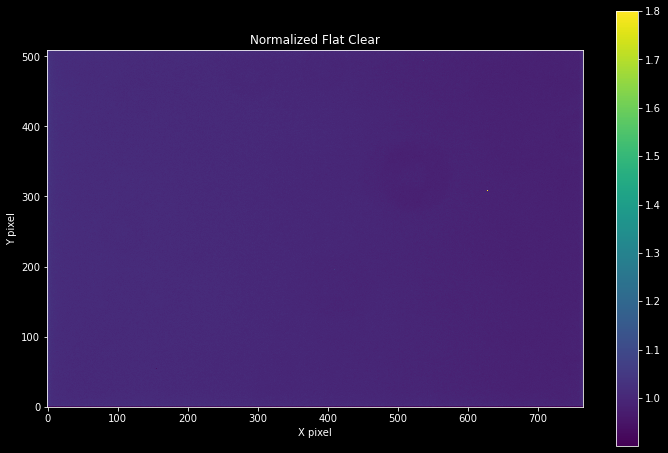

In [34]:
pl.figure(figsize=(12,8))

_=pl.imshow(normalized_mean_clear_flat, origin='lower', interpolation='none')
_=pl.colorbar()
_=pl.title("Normalized Flat Clear")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

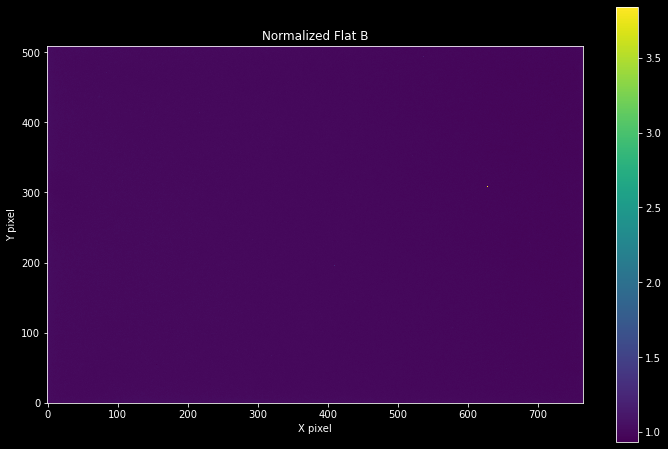

In [35]:
pl.figure(figsize=(12,8))

_=pl.imshow(normalized_mean_B_flat, origin='lower', interpolation='none')
_=pl.colorbar()
_=pl.title("Normalized Flat B")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

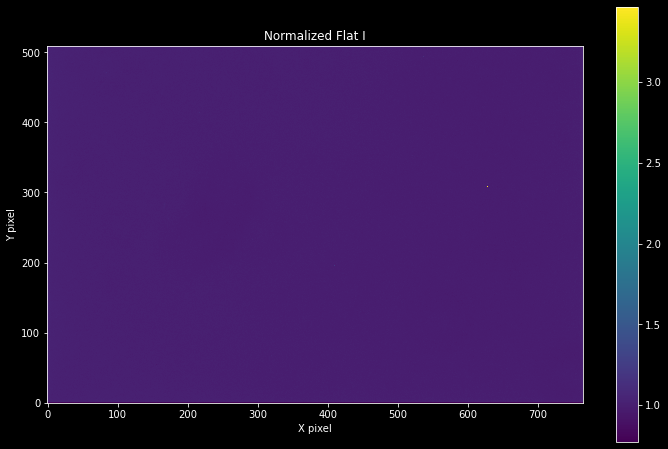

In [36]:
pl.figure(figsize=(12,8))

_=pl.imshow(normalized_mean_I_flat, origin='lower', interpolation='none')
_=pl.colorbar()
_=pl.title("Normalized Flat I")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

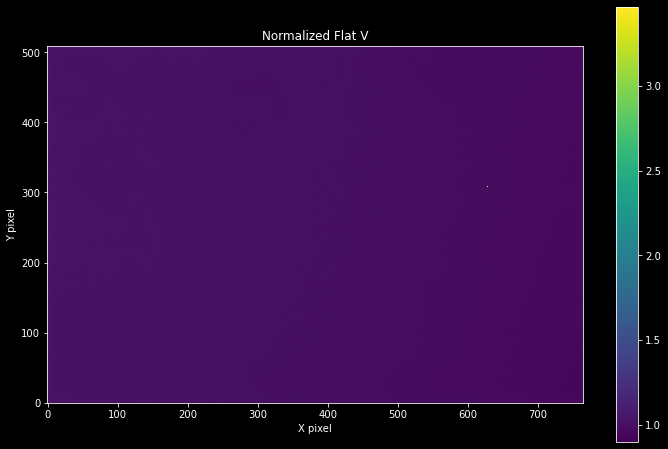

In [37]:
pl.figure(figsize=(12,8))

_=pl.imshow(normalized_mean_V_flat, origin='lower', interpolation='none')
_=pl.colorbar()
_=pl.title("Normalized Flat V")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

## Normalized Flat Uncertainty

In [38]:
## Normalized uncertanties for each flat filter 
normalized_flat_clear_uncertainty = flat_clear_total_uncertainty / mean_of_flat_clear
normalized_flat_B_uncertainty = flat_B_total_uncertainty / mean_of_flat_B
normalized_flat_I_uncertainty = flat_I_total_uncertainty / mean_of_flat_I
normalized_flat_V_uncertainty = flat_V_total_uncertainty / mean_of_flat_V
normalized_flat_uncertainty = [normalized_flat_clear_uncertainty, normalized_flat_B_uncertainty, normalized_flat_V_uncertainty, normalized_flat_I_uncertainty]

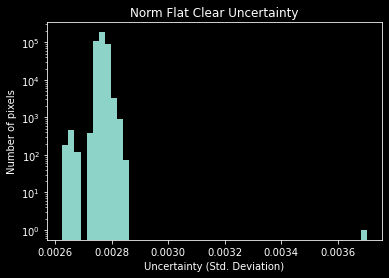

In [39]:
pl.title("Norm Flat Clear Uncertainty")
pl.xlabel("Uncertainty (Std. Deviation)")
pl.ylabel("Number of pixels")
_=pl.hist(normalized_flat_clear_uncertainty.ravel(), bins=50, log=True)

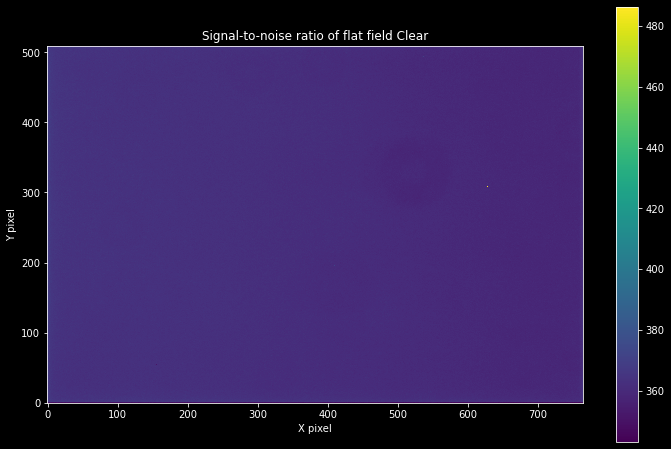

In [40]:
pl.figure(figsize=(12,8))
pl.title("Signal-to-noise ratio of flat field Clear")
pl.imshow(normalized_mean_clear_flat / normalized_flat_clear_uncertainty, origin='lower', interpolation='none')
pl.colorbar()
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

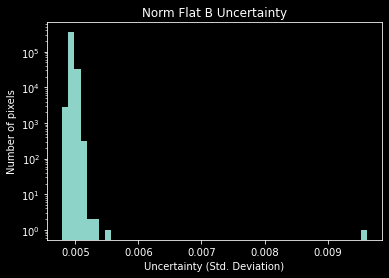

In [41]:
pl.title("Norm Flat B Uncertainty")
pl.xlabel("Uncertainty (Std. Deviation)")
pl.ylabel("Number of pixels")
_=pl.hist(normalized_flat_B_uncertainty.ravel(), bins=50, log=True)

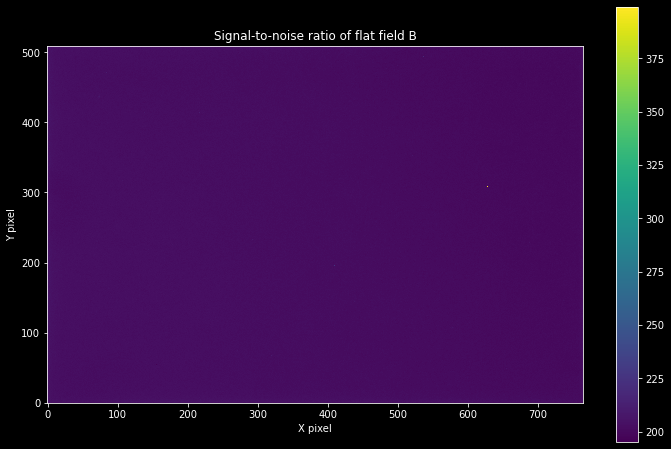

In [42]:
pl.figure(figsize=(12,8))
pl.title("Signal-to-noise ratio of flat field B")
pl.imshow(normalized_mean_B_flat / normalized_flat_B_uncertainty, origin='lower', interpolation='none')
pl.colorbar()
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

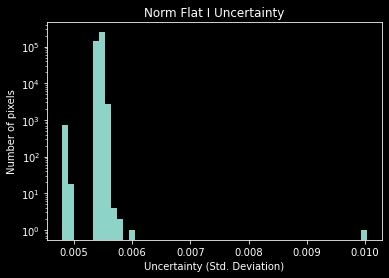

In [43]:
pl.title("Norm Flat I Uncertainty")
pl.xlabel("Uncertainty (Std. Deviation)")
pl.ylabel("Number of pixels")
_=pl.hist(normalized_flat_I_uncertainty.ravel(), bins=50, log=True)

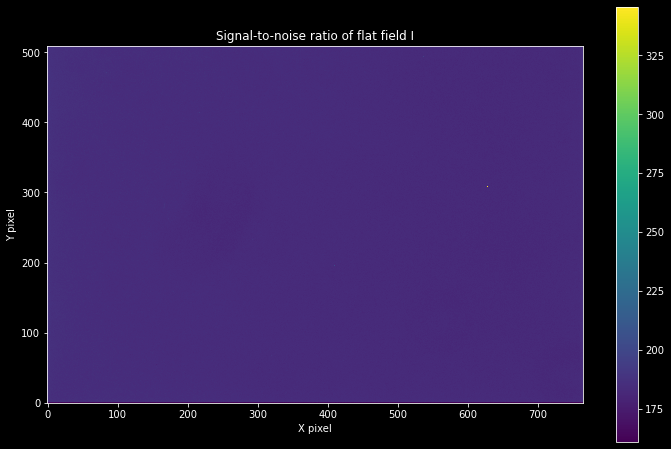

In [44]:
pl.figure(figsize=(12,8))
pl.title("Signal-to-noise ratio of flat field I")
pl.imshow(normalized_mean_I_flat / normalized_flat_I_uncertainty, origin='lower', interpolation='none')
pl.colorbar()
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

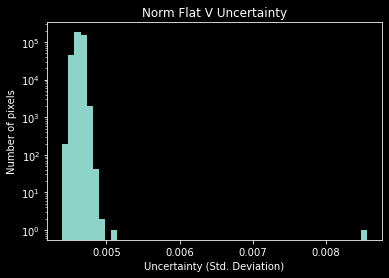

In [45]:
pl.title("Norm Flat V Uncertainty")
pl.xlabel("Uncertainty (Std. Deviation)")
pl.ylabel("Number of pixels")
_=pl.hist(normalized_flat_V_uncertainty.ravel(), bins=50, log=True)

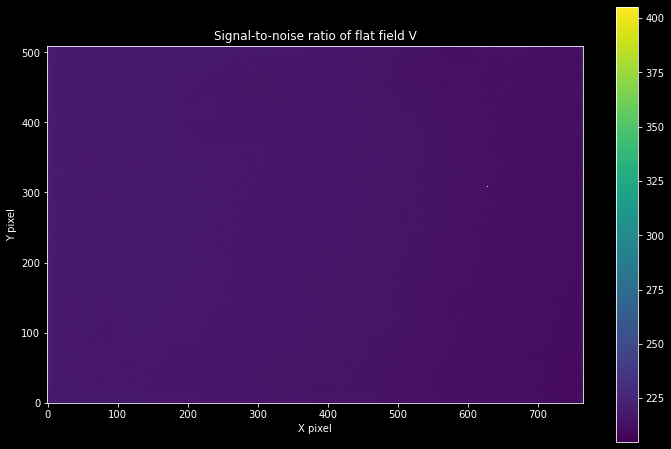

In [46]:
pl.figure(figsize=(12,8))
pl.title("Signal-to-noise ratio of flat field V")
pl.imshow(normalized_mean_V_flat / normalized_flat_V_uncertainty, origin='lower', interpolation='none')
pl.colorbar()
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

## Dark Average


In [47]:
## 40 ms darks -- biases
biases = glob.glob("Darks\\dark_40ms*.FIT")
dark_40ms = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in biases]
average_40ms_dark = np.mean(dark_40ms, axis=0)
stddev_40ms_dark = np.std(dark_40ms, axis=0)
del dark_40ms

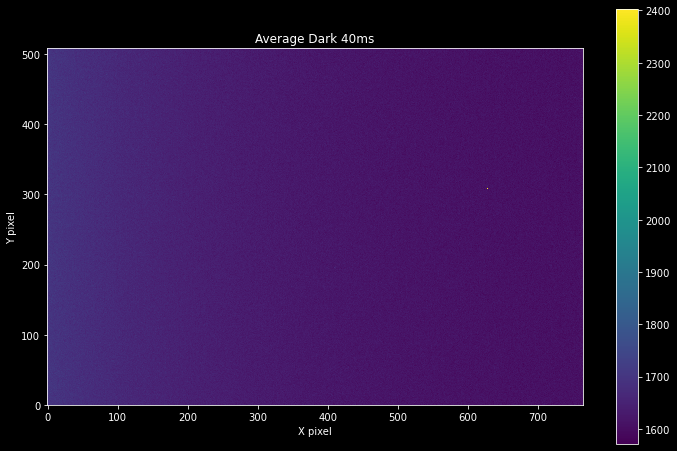

In [48]:
pl.figure(figsize=(12,8))
pl.imshow(average_40ms_dark, origin='lower', interpolation='none', vmax=1550*gain)
pl.colorbar()
_=pl.title("Average Dark 40ms")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

In [49]:
uncertainty_on_40ms_mean_dark = stddev_40ms_dark / np.sqrt(len(biases))

## Saturn Clear 40ms

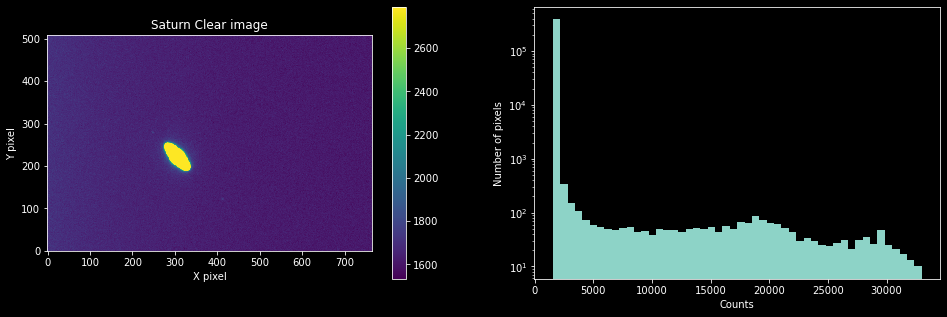

In [50]:
fn = 'Saturn\\saturn_40ms_Clear001.FIT'
gain = fits.getheader(fn)['EGAIN']
saturn_clear = fits.getdata(fn)*gain

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_clear, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("Saturn Clear image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(saturn_clear.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

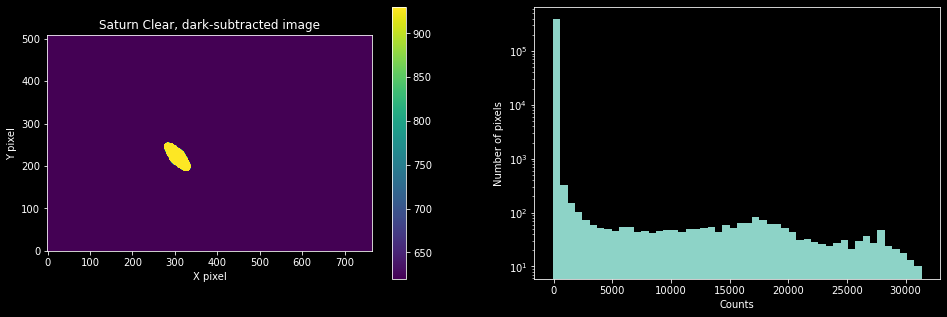

In [51]:
saturn_clear_darksub = saturn_clear - average_40ms_dark
saturn_clear_darksub_uncertainty = (saturn_clear_darksub + readnoise**2 + uncertainty_on_40ms_mean_dark**2)**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_clear_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("Saturn Clear, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(saturn_clear_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

<ipython-input-52-9ac4d38c76fe>:4: RuntimeWarning: divide by zero encountered in true_divide
  saturn_clear_darksub_uncertainty**2 / saturn_clear_darksub**2 +
<ipython-input-52-9ac4d38c76fe>:3: RuntimeWarning: invalid value encountered in multiply
  saturn_clear_darksub_flattened_uncertainty = ((


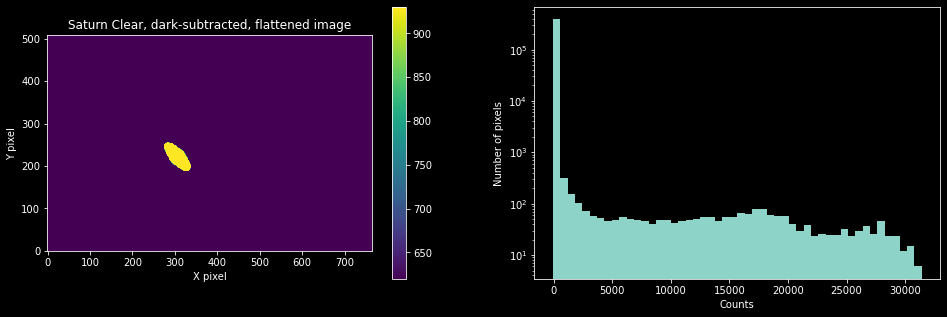

In [52]:
saturn_clear_darksub_flattened = saturn_clear_darksub / normalized_mean_clear_flat

saturn_clear_darksub_flattened_uncertainty = ((
    saturn_clear_darksub_uncertainty**2 / saturn_clear_darksub**2 +
    normalized_flat_clear_uncertainty**2 / normalized_mean_clear_flat**2
) * saturn_clear_darksub_flattened**2)**0.5

saturn_clear_darksub_flattened_uncertainty = ((
    saturn_clear_darksub_uncertainty**2 / normalized_mean_clear_flat**2 +
    normalized_flat_clear_uncertainty**2 * saturn_clear_darksub**2 / normalized_mean_clear_flat**4
))**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_clear_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("Saturn Clear, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(saturn_clear_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

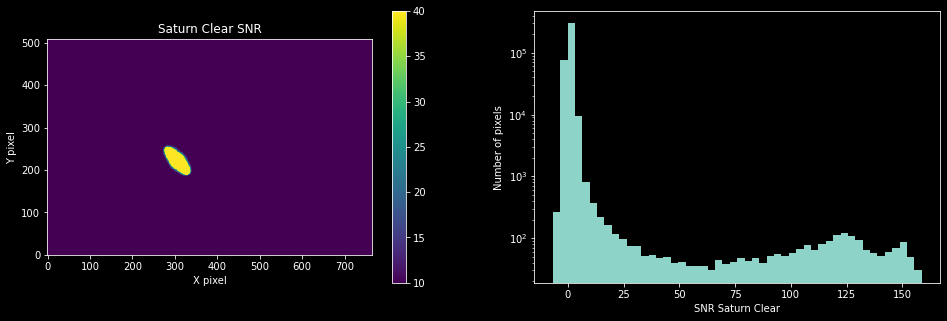

In [53]:
pl.figure(figsize=(16,5))
SNR_saturn_clear = saturn_clear_darksub_flattened / saturn_clear_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR_saturn_clear, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("Saturn Clear SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
_=pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR_saturn_clear.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR Saturn Clear")
_ = pl.ylabel("Number of pixels")

## Saturn B 40 ms

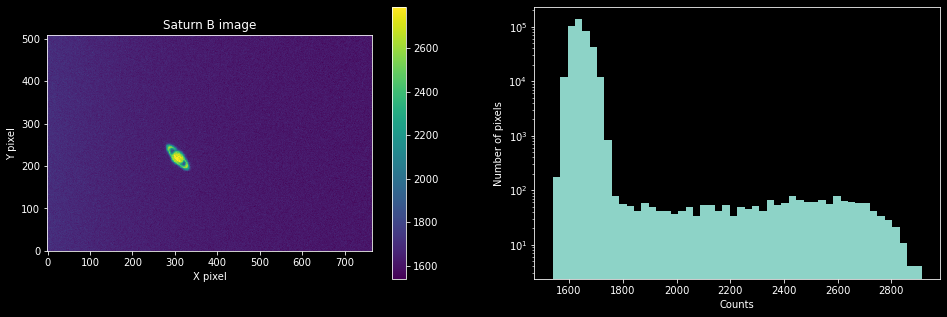

In [54]:
fn = 'Saturn\\saturn_40ms_B005.FIT'
gain = fits.getheader(fn)['EGAIN']
saturn_B = fits.getdata(fn)*gain

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_B, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("Saturn B image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(saturn_B.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

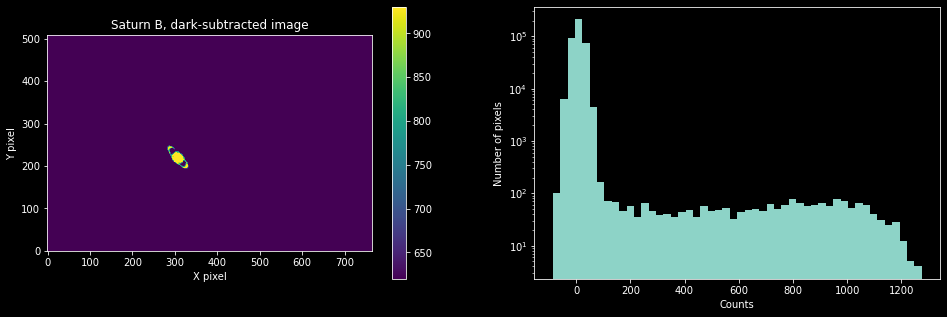

In [55]:
saturn_B_darksub = saturn_B - average_40ms_dark
saturn_B_darksub_uncertainty = (saturn_B_darksub + readnoise**2 + uncertainty_on_40ms_mean_dark**2)**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_B_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("Saturn B, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(saturn_B_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

<ipython-input-56-34c1ed9b36b1>:4: RuntimeWarning: divide by zero encountered in true_divide
  saturn_B_darksub_uncertainty**2 / saturn_B_darksub**2 +
<ipython-input-56-34c1ed9b36b1>:3: RuntimeWarning: invalid value encountered in multiply
  saturn_B_darksub_flattened_uncertainty = ((


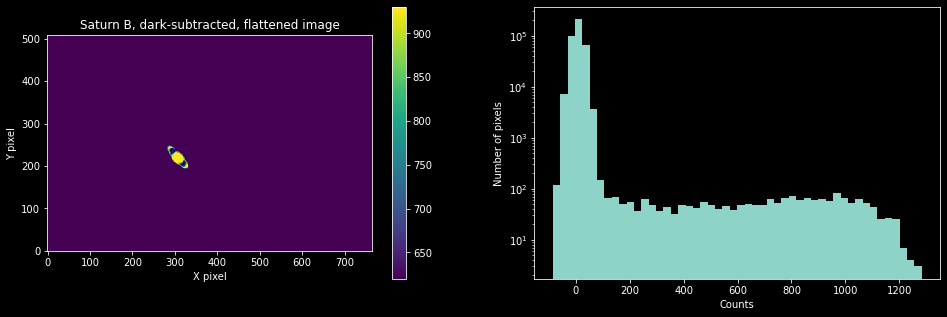

In [56]:
saturn_B_darksub_flattened = saturn_B_darksub / normalized_mean_B_flat

saturn_B_darksub_flattened_uncertainty = ((
    saturn_B_darksub_uncertainty**2 / saturn_B_darksub**2 +
    normalized_flat_B_uncertainty**2 / normalized_mean_B_flat**2
) * saturn_B_darksub_flattened**2)**0.5

saturn_B_darksub_flattened_uncertainty = ((
    saturn_B_darksub_uncertainty**2 / normalized_mean_B_flat**2 +
    normalized_flat_B_uncertainty**2 * saturn_B_darksub**2 / normalized_mean_B_flat**4
))**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_B_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("Saturn B, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(saturn_B_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

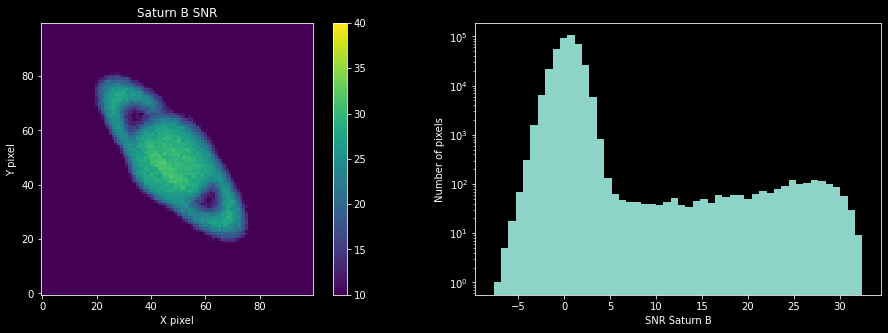

In [57]:
pl.figure(figsize=(16,5))
SNR_saturn_B = saturn_B_darksub_flattened / saturn_B_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR_saturn_B[170:270,260:360], origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("Saturn B SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR_saturn_B.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR Saturn B")
_ = pl.ylabel("Number of pixels")

In [60]:
#file = 'Saturn\\saturn_40ms_Clear001.FIT'
#header = fits.getheader(file)

In [61]:
#fh = fits.PrimaryHDU(data = saturn_B_darksub_flattened, header=header) 
#fh.writeto('saturn_B_darksub_flattened.FIT', overwrite=True)

In [63]:
#fh = fits.PrimaryHDU(data = saturn_B_darksub_flattened_uncertainty, header=header) 
#fh.writeto('saturn_B_darksub_flattened_uncertainty.FIT', overwrite=True)

## Saturn I 40ms

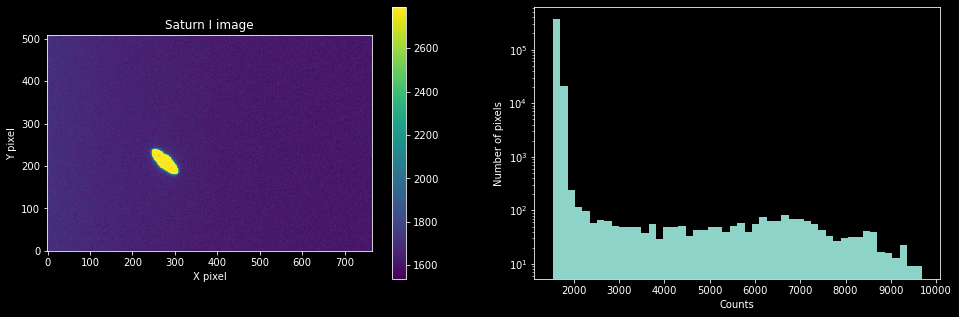

In [64]:
fn = 'Saturn\\saturn_40ms_I001.FIT'
gain = fits.getheader(fn)['EGAIN']
saturn_I = fits.getdata(fn)*gain

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_I, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("Saturn I image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(saturn_I.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

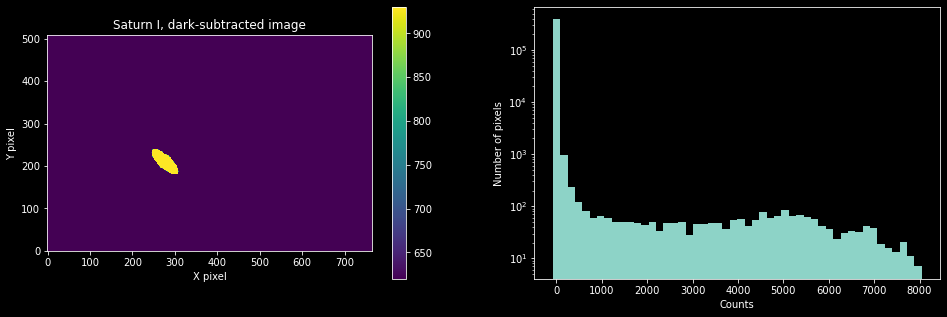

In [65]:
saturn_I_darksub = saturn_I - average_40ms_dark
saturn_I_darksub_uncertainty = (saturn_I_darksub + readnoise**2 + uncertainty_on_40ms_mean_dark**2)**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_I_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("Saturn I, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(saturn_I_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

<ipython-input-66-09ae07c6444c>:4: RuntimeWarning: divide by zero encountered in true_divide
  saturn_I_darksub_uncertainty**2 / saturn_I_darksub**2 +
<ipython-input-66-09ae07c6444c>:3: RuntimeWarning: invalid value encountered in multiply
  saturn_I_darksub_flattened_uncertainty = ((


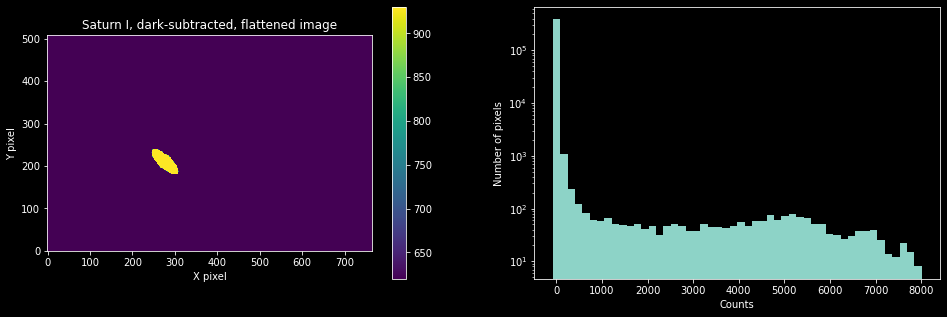

In [66]:
saturn_I_darksub_flattened = saturn_I_darksub / normalized_mean_I_flat

saturn_I_darksub_flattened_uncertainty = ((
    saturn_I_darksub_uncertainty**2 / saturn_I_darksub**2 +
    normalized_flat_I_uncertainty**2 / normalized_mean_I_flat**2
) * saturn_I_darksub_flattened**2)**0.5

saturn_I_darksub_flattened_uncertainty = ((
    saturn_I_darksub_uncertainty**2 / normalized_mean_I_flat**2 +
    normalized_flat_I_uncertainty**2 * saturn_I_darksub**2 / normalized_mean_I_flat**4
))**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_I_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("Saturn I, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(saturn_I_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

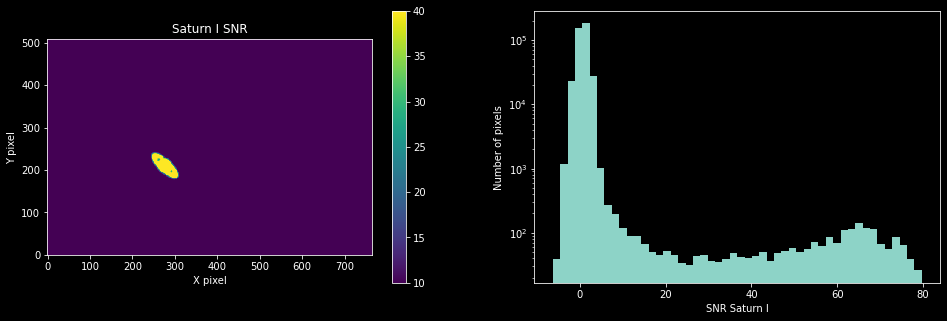

In [67]:
pl.figure(figsize=(16,5))
SNR_saturn_I = saturn_I_darksub_flattened / saturn_I_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR_saturn_I, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("Saturn I SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR_saturn_I.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR Saturn I")
_ = pl.ylabel("Number of pixels")

In [ ]:
#fh = fits.PrimaryHDU(data = saturn_I_darksub_flattened, header=header) 
#fh.writeto('saturn_I_darksub_flattened.FIT', overwrite=True)

In [68]:
#fh = fits.PrimaryHDU(data = saturn_I_darksub_flattened_uncertainty, header=header) 
#fh.writeto('saturn_I_darksub_flattened_uncertainty.FIT', overwrite=True)

## Saturn V 40 ms

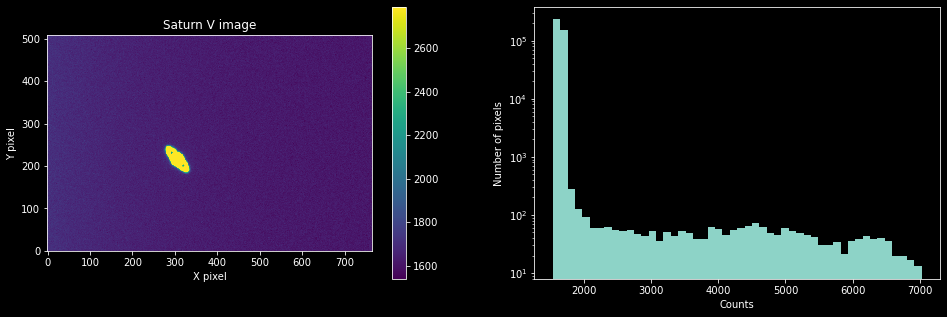

In [69]:
fn = 'Saturn\\saturn_40ms_V001.FIT'
gain = fits.getheader(fn)['EGAIN']
saturn_V = fits.getdata(fn)*gain

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_V, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("Saturn V image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(saturn_V.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

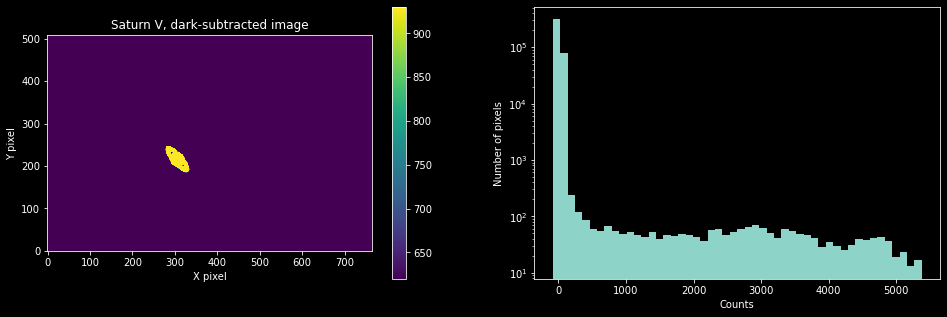

In [70]:
saturn_V_darksub = saturn_V - average_40ms_dark
saturn_V_darksub_uncertainty = (saturn_V_darksub + readnoise**2 + uncertainty_on_40ms_mean_dark**2)**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_V_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("Saturn V, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(saturn_V_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

<ipython-input-71-7cf2f9648fa5>:4: RuntimeWarning: divide by zero encountered in true_divide
  saturn_V_darksub_uncertainty**2 / saturn_V_darksub**2 +
<ipython-input-71-7cf2f9648fa5>:3: RuntimeWarning: invalid value encountered in multiply
  saturn_V_darksub_flattened_uncertainty = ((


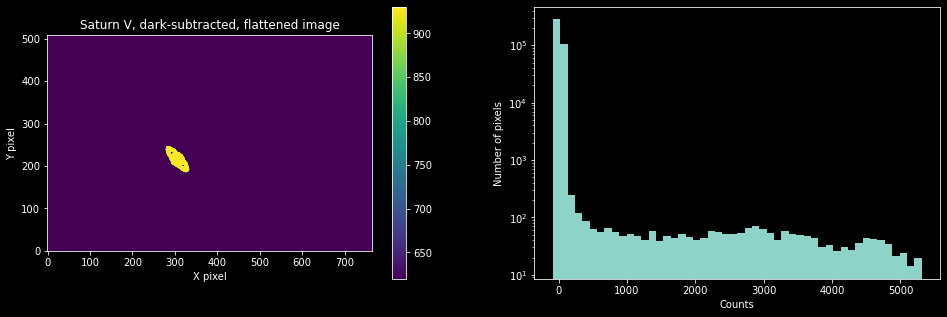

In [71]:
saturn_V_darksub_flattened = saturn_V_darksub / normalized_mean_V_flat

saturn_V_darksub_flattened_uncertainty = ((
    saturn_V_darksub_uncertainty**2 / saturn_V_darksub**2 +
    normalized_flat_V_uncertainty**2 / normalized_mean_V_flat**2
) * saturn_V_darksub_flattened**2)**0.5

saturn_V_darksub_flattened_uncertainty = ((
    saturn_V_darksub_uncertainty**2 / normalized_mean_V_flat**2 +
    normalized_flat_V_uncertainty**2 * saturn_V_darksub**2 / normalized_mean_V_flat**4
))**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_V_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("Saturn V, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(saturn_V_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

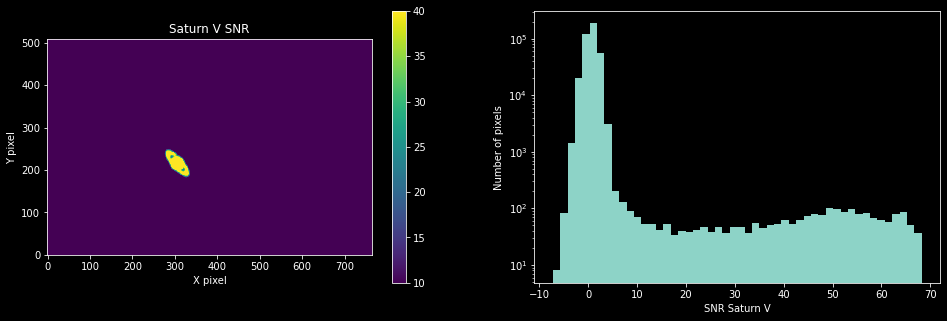

In [72]:
pl.figure(figsize=(16,5))
SNR_saturn_V = saturn_V_darksub_flattened / saturn_V_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR_saturn_V, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("Saturn V SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR_saturn_V.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR Saturn V")
_ = pl.ylabel("Number of pixels")

In [ ]:
#fh = fits.PrimaryHDU(data = saturn_V_darksub_flattened, header=header) 
#fh.writeto('saturn_V_darksub_flattened.FIT', overwrite=True)

In [ ]:
#fh = fits.PrimaryHDU(data = saturn_V_darksub_flattened_uncertainty, header=header) 
#fh.writeto('saturn_V_darksub_flattened_uncertainty.FIT', overwrite=True)

In [ ]:
pwd


## Jupiter Clear 40ms

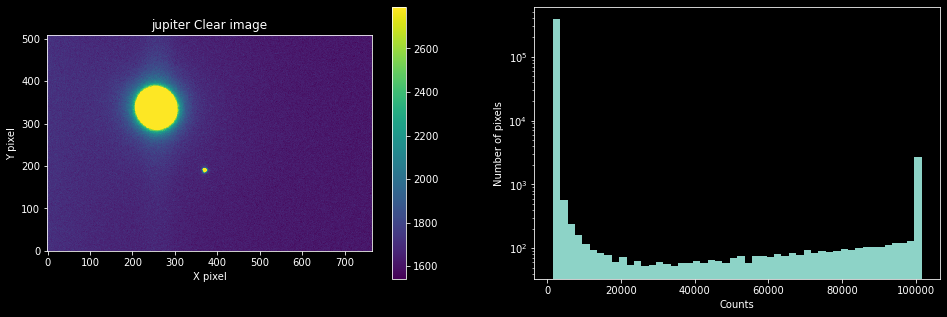

In [73]:
file = 'Jupiter\\jupiter_40ms_Clear001.FIT'
header = fits.getheader(file)
gain = fits.getheader(file)['EGAIN']
jupiter_clear = fits.getdata(file)*gain

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_clear, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("jupiter Clear image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(jupiter_clear.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

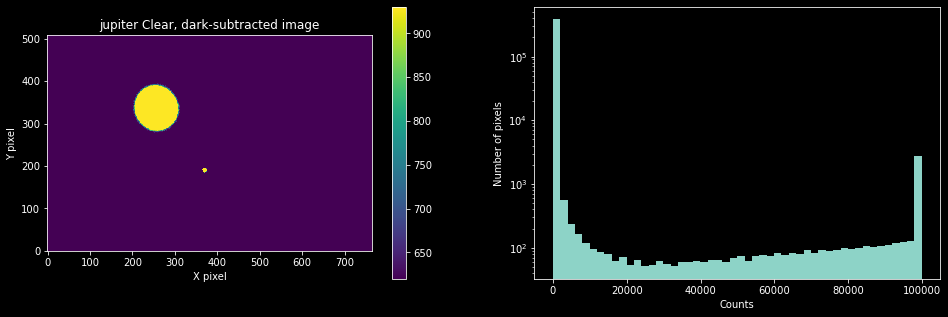

In [74]:
jupiter_clear_darksub = jupiter_clear - average_40ms_dark
jupiter_clear_darksub_uncertainty = (jupiter_clear_darksub + readnoise**2 + uncertainty_on_40ms_mean_dark**2)**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_clear_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("jupiter Clear, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(jupiter_clear_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

<ipython-input-75-db46b5aa813c>:4: RuntimeWarning: divide by zero encountered in true_divide
  jupiter_clear_darksub_uncertainty**2 / jupiter_clear_darksub**2 +
<ipython-input-75-db46b5aa813c>:3: RuntimeWarning: invalid value encountered in multiply
  jupiter_clear_darksub_flattened_uncertainty = ((


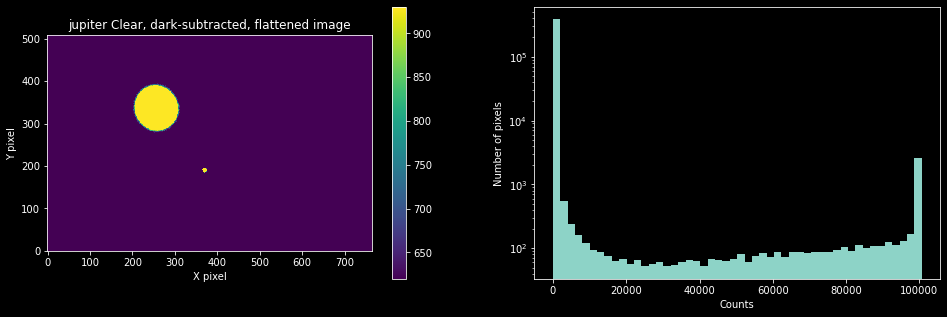

In [75]:
jupiter_clear_darksub_flattened = jupiter_clear_darksub / normalized_mean_clear_flat

jupiter_clear_darksub_flattened_uncertainty = ((
    jupiter_clear_darksub_uncertainty**2 / jupiter_clear_darksub**2 +
    normalized_flat_clear_uncertainty**2 / normalized_mean_clear_flat**2
) * jupiter_clear_darksub_flattened**2)**0.5

jupiter_clear_darksub_flattened_uncertainty = ((
    jupiter_clear_darksub_uncertainty**2 / normalized_mean_clear_flat**2 +
    normalized_flat_clear_uncertainty**2 * jupiter_clear_darksub**2 / normalized_mean_clear_flat**4
))**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_clear_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("jupiter Clear, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(jupiter_clear_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

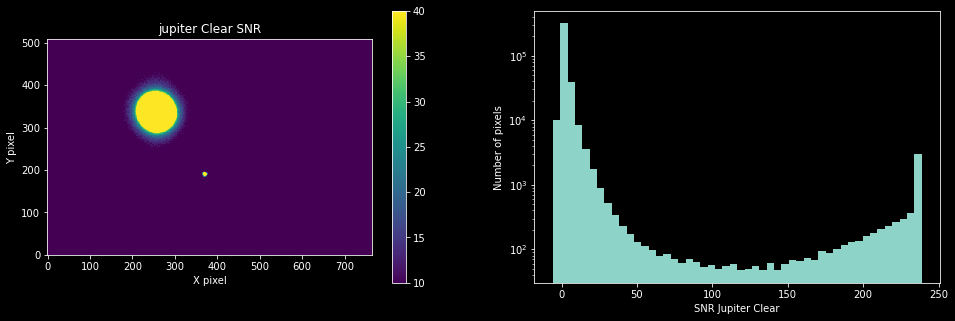

In [76]:
pl.figure(figsize=(16,5))
SNR_jupiter_clear = jupiter_clear_darksub_flattened / jupiter_clear_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR_jupiter_clear, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("jupiter Clear SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR_jupiter_clear.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR Jupiter Clear")
_ = pl.ylabel("Number of pixels")

## Jupiter B 40 ms

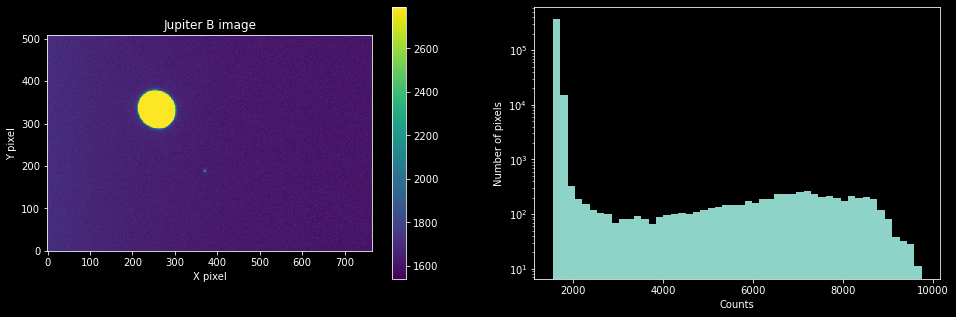

In [77]:
fn = 'Jupiter\\jupiter_40ms_B001.FIT'
gain = fits.getheader(fn)['EGAIN']
jupiter_B = fits.getdata(fn)*gain

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_B, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("Jupiter B image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(jupiter_B.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

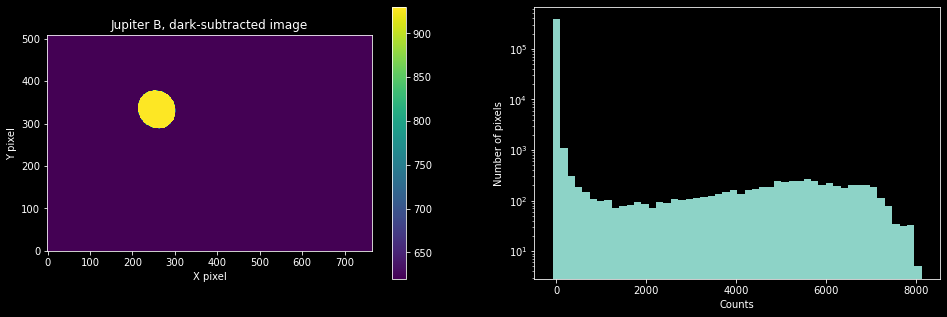

In [78]:
jupiter_B_darksub = jupiter_B - average_40ms_dark
jupiter_B_darksub_uncertainty = (jupiter_B_darksub + readnoise**2 + uncertainty_on_40ms_mean_dark**2)**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_B_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("Jupiter B, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(jupiter_B_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

<ipython-input-79-ab7c12f1af63>:4: RuntimeWarning: divide by zero encountered in true_divide
  jupiter_B_darksub_uncertainty**2 / jupiter_B_darksub**2 +
<ipython-input-79-ab7c12f1af63>:3: RuntimeWarning: invalid value encountered in multiply
  jupiter_B_darksub_flattened_uncertainty = ((


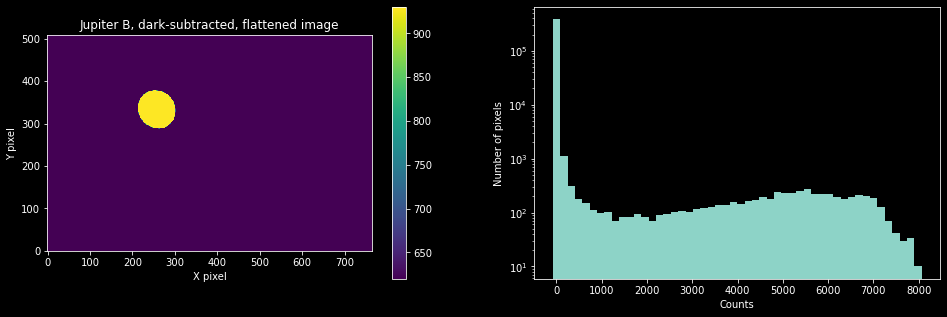

In [79]:
jupiter_B_darksub_flattened = jupiter_B_darksub / normalized_mean_B_flat

jupiter_B_darksub_flattened_uncertainty = ((
    jupiter_B_darksub_uncertainty**2 / jupiter_B_darksub**2 +
    normalized_flat_B_uncertainty**2 / normalized_mean_B_flat**2
) * jupiter_B_darksub_flattened**2)**0.5

jupiter_B_darksub_flattened_uncertainty = ((
    jupiter_B_darksub_uncertainty**2 / normalized_mean_B_flat**2 +
    normalized_flat_B_uncertainty**2 * jupiter_B_darksub**2 / normalized_mean_B_flat**4
))**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_B_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("Jupiter B, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(jupiter_B_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

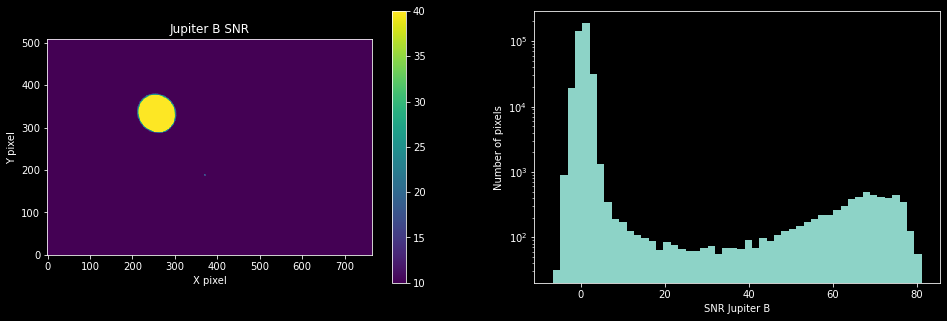

In [80]:
pl.figure(figsize=(16,5))
SNR_jupiter_B = jupiter_B_darksub_flattened / jupiter_B_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR_jupiter_B, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("Jupiter B SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR_jupiter_B.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR Jupiter B")
_ = pl.ylabel("Number of pixels")

In [ ]:
#fh = fits.PrimaryHDU(data = jupiter_B_darksub_flattened, header=header) 
#fh.writeto('jupiter_B_darksub_flattened.FIT', overwrite=True)

In [81]:
#fh = fits.PrimaryHDU(data = jupiter_B_darksub_flattened_uncertainty, header=header) 
#fh.writeto('jupiter_B_darksub_flattened_uncertainty.FIT', overwrite=True)
#

## Jupiter I 40ms

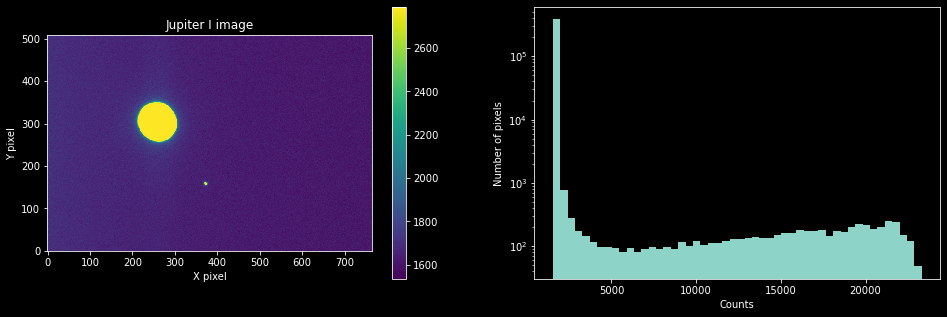

In [82]:
fn = 'Jupiter\\jupiter_40ms_I001.FIT'
gain = fits.getheader(fn)['EGAIN']
jupiter_I = fits.getdata(fn)*gain

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_I, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("Jupiter I image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(jupiter_I.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

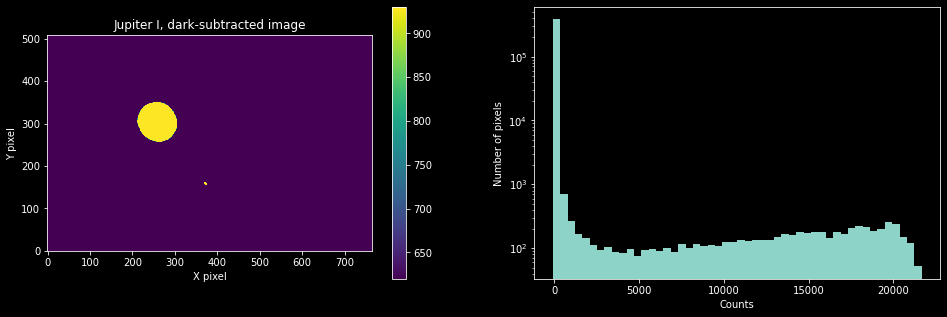

In [83]:
jupiter_I_darksub = jupiter_I - average_40ms_dark
jupiter_I_darksub_uncertainty = (jupiter_I_darksub + readnoise**2 + uncertainty_on_40ms_mean_dark**2)**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_I_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("Jupiter I, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(jupiter_I_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

<ipython-input-84-f0e6d02f9d05>:4: RuntimeWarning: divide by zero encountered in true_divide
  jupiter_I_darksub_uncertainty**2 / jupiter_I_darksub**2 +
<ipython-input-84-f0e6d02f9d05>:3: RuntimeWarning: invalid value encountered in multiply
  jupiter_I_darksub_flattened_uncertainty = ((


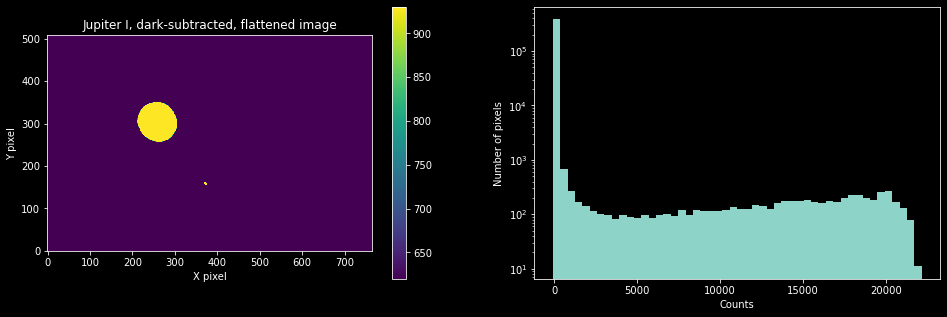

In [84]:
jupiter_I_darksub_flattened = jupiter_I_darksub / normalized_mean_I_flat

jupiter_I_darksub_flattened_uncertainty = ((
    jupiter_I_darksub_uncertainty**2 / jupiter_I_darksub**2 +
    normalized_flat_I_uncertainty**2 / normalized_mean_I_flat**2
) * jupiter_I_darksub_flattened**2)**0.5

jupiter_I_darksub_flattened_uncertainty = ((
    jupiter_I_darksub_uncertainty**2 / normalized_mean_I_flat**2 +
    normalized_flat_I_uncertainty**2 * jupiter_I_darksub**2 / normalized_mean_I_flat**4
))**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_I_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("Jupiter I, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(jupiter_I_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

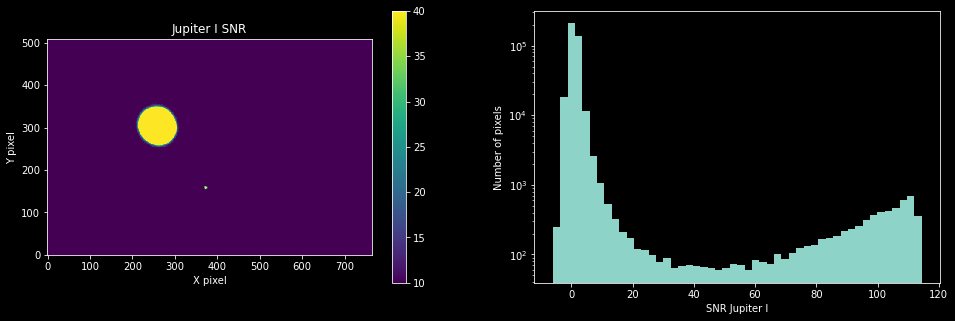

In [85]:
pl.figure(figsize=(16,5))
SNR_jupiter_I = jupiter_I_darksub_flattened / jupiter_I_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR_jupiter_I, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("Jupiter I SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR_jupiter_I.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR Jupiter I")
_ = pl.ylabel("Number of pixels")

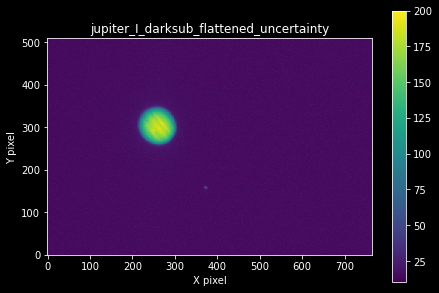

In [86]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_I_darksub_flattened_uncertainty, origin='lower', interpolation='none', vmin=10, vmax=200)
_=pl.title("jupiter_I_darksub_flattened_uncertainty")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

flux +- jupiter_I_darksub_flattened_uncertainty (per pixle, use prop of error formula on this)


flux and uncertianty in flux which is 1 number per filter
(uncertainty**2).sum()**0.5: uncertainty


SNR
of flux measurement = flux/uncertainty 

In [ ]:
#fh = fits.PrimaryHDU(data = jupiter_I_darksub_flattened, header=header) 
#fh.writeto('jupiter_I_darksub_flattened.FIT', overwrite=True)
#

In [ ]:
#fh = fits.PrimaryHDU(data = jupiter_I_darksub_flattened_uncertainty, header=header) 
#fh.writeto('jupiter_I_darksub_flattened_uncertainty.FIT', overwrite=True)

## Jupiter V 40ms

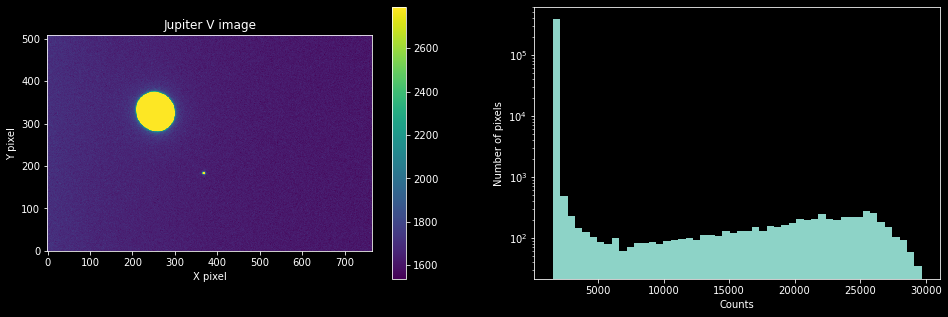

In [87]:
fn = 'Jupiter\\jupiter_40ms_V001.FIT'
gain = fits.getheader(fn)['EGAIN']
jupiter_V = fits.getdata(fn)*gain

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_V, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("Jupiter V image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(jupiter_V.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

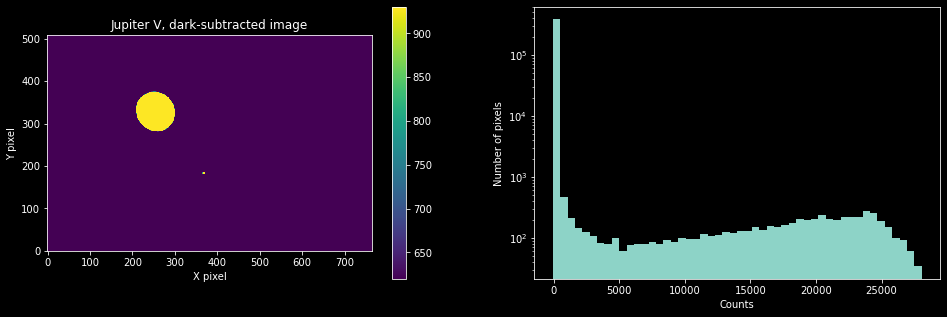

In [88]:
jupiter_V_darksub = jupiter_V - average_40ms_dark
jupiter_V_darksub_uncertainty = (jupiter_V_darksub + readnoise**2 + uncertainty_on_40ms_mean_dark**2)**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_V_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("Jupiter V, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(jupiter_V_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

<ipython-input-89-f760fc483831>:4: RuntimeWarning: divide by zero encountered in true_divide
  jupiter_V_darksub_uncertainty**2 / jupiter_V_darksub**2 +
<ipython-input-89-f760fc483831>:3: RuntimeWarning: invalid value encountered in multiply
  jupiter_V_darksub_flattened_uncertainty = ((


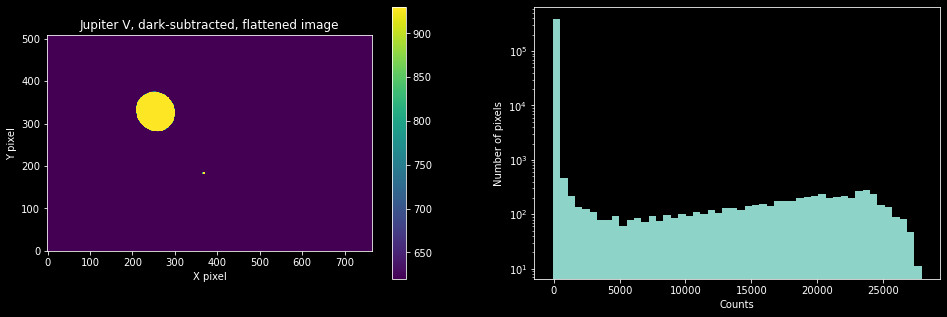

In [89]:
jupiter_V_darksub_flattened = jupiter_V_darksub / normalized_mean_V_flat

jupiter_V_darksub_flattened_uncertainty = ((
    jupiter_V_darksub_uncertainty**2 / jupiter_V_darksub**2 +
    normalized_flat_V_uncertainty**2 / normalized_mean_V_flat**2
) * jupiter_V_darksub_flattened**2)**0.5

jupiter_V_darksub_flattened_uncertainty = ((
    jupiter_V_darksub_uncertainty**2 / normalized_mean_V_flat**2 +
    normalized_flat_V_uncertainty**2 * jupiter_V_darksub**2 / normalized_mean_V_flat**4
))**0.5

pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_V_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("Jupiter V, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(jupiter_V_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

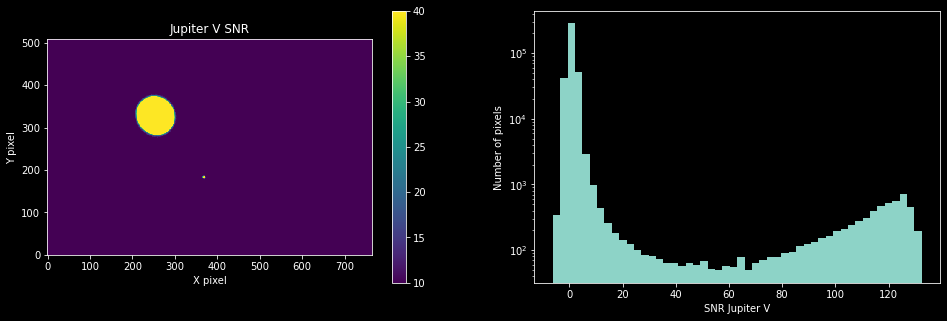

In [90]:
pl.figure(figsize=(16,5))
SNR_jupiter_V = jupiter_V_darksub_flattened / jupiter_V_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR_jupiter_V, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("Jupiter V SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR_jupiter_V.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR Jupiter V")
_ = pl.ylabel("Number of pixels")

In [91]:
#fh = fits.PrimaryHDU(data = jupiter_V_darksub_flattened_uncertainty, header=header) 
#fh.writeto('jupiter_V_darksub_flattened_uncertainty.FIT', overwrite=True)

## Saturn RGB

In [92]:
os.chdir("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 1\\AST3722-Fall-2021-09-29-21\\Saturn")
SaturnFilelist = ['saturn_40ms_B002.FIT', 'saturn_40ms_B003.FIT', 'saturn_40ms_B004.FIT', 'saturn_40ms_B005.FIT',
                  'saturn_40ms_V001.FIT', 'saturn_40ms_V002.FIT', 'saturn_40ms_V003.FIT',
                  'saturn_40ms_V004.FIT', 'saturn_40ms_V005.FIT',
                  'saturn_40ms_I001.FIT', 'saturn_40ms_I002.FIT', 'saturn_40ms_I003.FIT',
                  'saturn_40ms_I004.FIT', 'saturn_40ms_I005.FIT']

#'saturn_40ms_Clear001.FIT', 'saturn_40ms_Clear002.FIT', 'saturn_40ms_Clear003.FIT','saturn_40ms_Clear004.FIT', 'saturn_40ms_Clear005.FIT',
# Clear center x 307.9, 308.9, 308.9, 308.5, 309.6
# clear center y 222.1, 221.2, 224.5, 223.5, 222.3

SatCent_X = [310.6, 310.2, 310.2, 309.0, 
            307.3, 310.4, 309.5, 307.9, 308.1,
            278.1, 277.1, 278.1, 277.3, 278.3]

SatCent_Y = [219.6, 221.6, 220.0, 220.1,
            215.7, 214.6, 215.0, 215.6, 215.6,
            210.9, 211.3, 213.0, 213.0, 213.2]

## refrence saturn_40ms_B001.FIT
refx, refy = 309.4, 219.6
Sat_shift = [fits.getdata('saturn_40ms_B001.FIT')*fits.getheader('saturn_40ms_B001.FIT')['EGAIN']]
    
for i in range(len(SaturnFilelist)):
    im = fits.getdata(SaturnFilelist[i])*fits.getheader(SaturnFilelist[i])[ 'EGAIN']
    dx = refx - SatCent_X[i]
    dy = refy - SatCent_Y[i]
    dx, dy = round(dx), round(dy)    
    im_shift = np.roll(im, dy, axis=0)
    im_shift = np.roll(im_shift, dx, axis=1)
    Sat_shift.append(im_shift)
    #Saving the shifted images
    header = fits.getheader(SaturnFilelist[i])
    fh = fits.PrimaryHDU(data=im_shift, header=header) 
    fh.writeto('shifted_' + SaturnFilelist[i], overwrite=True)

header = fits.getheader('saturn_40ms_B001.FIT')
fh = fits.PrimaryHDU(data=Sat_shift[0], header=header) 
fh.writeto('shifted_' + 'saturn_40ms_B001.FIT', overwrite=True)    

flux total number of counts 

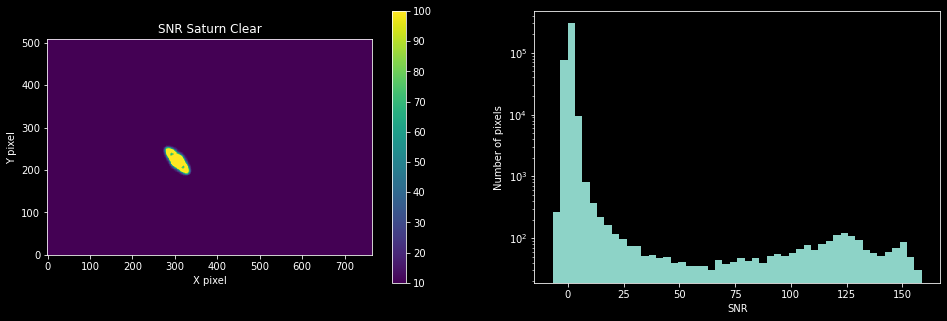

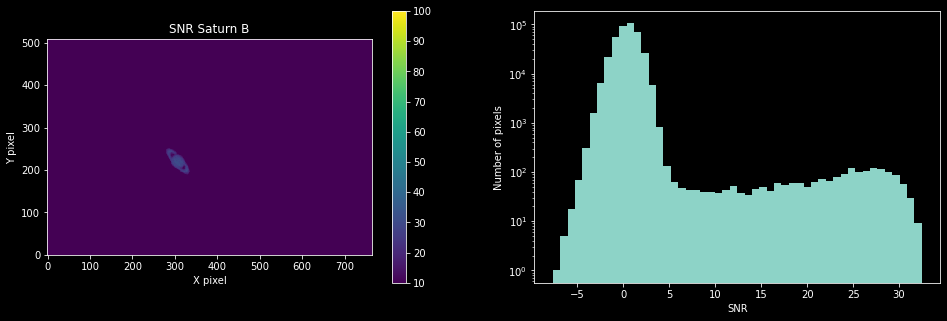

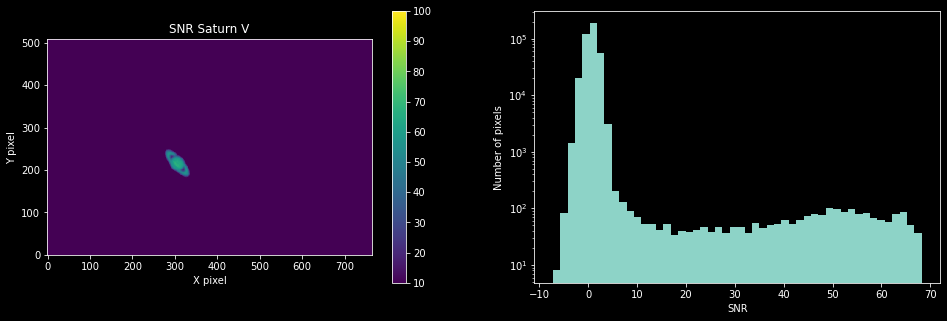

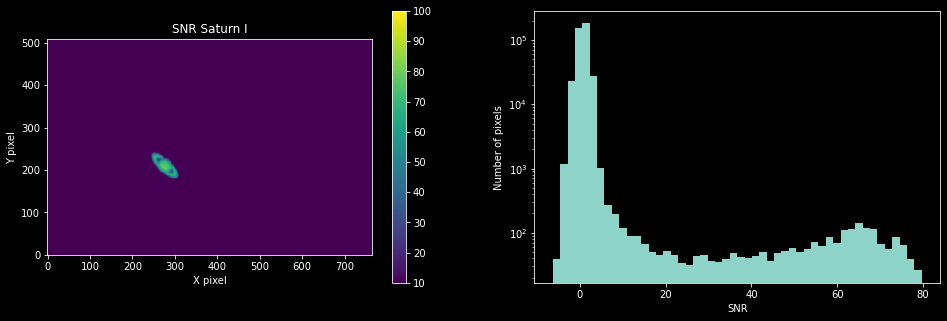

In [93]:
sat_SNR = [SNR_saturn_clear, SNR_saturn_B, SNR_saturn_V, SNR_saturn_I]

for i in range(len(sat_SNR)):
    pl.figure(figsize=(16,5))
    image = pl.subplot(1,2,1).imshow(sat_SNR[i], origin='lower', interpolation='none', vmin=10, vmax=100)
    titles = ["SNR Saturn Clear", "SNR Saturn B", "SNR Saturn V", "SNR Saturn I"]
    _=pl.title(titles[i])
    _=pl.xlabel("X pixel")
    _=pl.ylabel("Y pixel")
    pl.colorbar(image)
    #Histogram:
    _ = pl.subplot(1,2,2).hist(sat_SNR[i].ravel(), bins=50, log=True)
    _ = pl.xlabel("SNR")
    _ = pl.ylabel("Number of pixels")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


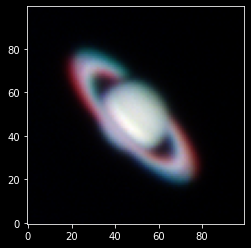

In [94]:
from glob import glob
from astropy.io import fits
from astropy import visualization
from astropy.visualization import simple_norm

file_list_sat_shift_B = glob('shifted_saturn_40ms_B*FIT')
file_list_sat_shift_V = glob('shifted_saturn_40ms_V*FIT')
file_list_sat_shift_I = glob('shifted_saturn_40ms_I*FIT')


timeseries_sat_B = np.array([fits.getdata(fn) for fn in file_list_sat_shift_B])
timeseries_sat_V = np.array([fits.getdata(fn) for fn in file_list_sat_shift_V])
timeseries_sat_I = np.array([fits.getdata(fn) for fn in file_list_sat_shift_I])


timeseries_sat = [timeseries_sat_B, timeseries_sat_V, timeseries_sat_I]

Bband_sat_median = np.median(timeseries_sat_B, axis = 0)
Vband_sat_median = np.median(timeseries_sat_V, axis = 0)
Iband_sat_median = np.median(timeseries_sat_I, axis = 0)

bslc = slice(170,270), slice(260,360)
vslc = slice(170,270), slice(260,360)
Islc = slice(170,270), slice(260,360)

max_ = 100
min_ = 10

norm_B = visualization.simple_norm(Bband_sat_median[bslc], 
                                   stretch = 'linear', 
                                   min_percent = min_, 
                                   max_percent = max_)

norm_V = visualization.simple_norm(Vband_sat_median[vslc], 
                                   stretch = 'linear', 
                                   min_percent = min_, 
                                   max_percent = max_)

norm_I = visualization.simple_norm(Iband_sat_median[Islc], 
                                   stretch = 'linear', 
                                   min_percent = min_, 
                                   max_percent = max_)

saturn_color = np.array([norm_I(Iband_sat_median),
                         norm_V(Vband_sat_median),
                         norm_B(Bband_sat_median)])


saturn_color=saturn_color.T.swapaxes(0,1)
saturn_color[:,:,0] = np.roll(saturn_color[:,:,0], 0, axis=0)
saturn_color[:,:,0] = np.roll(saturn_color[:,:,0], 0, axis=1)
bslc3d = (bslc[0], bslc[1], slice(None))

pl.imshow(saturn_color[bslc3d])

In [ ]:
fh = fits.PrimaryHDU(data = Iband_sat_median, header=header) 
fh.writeto('saturn_I_darksub_flattened.FIT', overwrite=True)

In [ ]:
fh = fits.PrimaryHDU(data = Vband_sat_median, header=header) 
fh.writeto('saturn_V_darksub_flattened.FIT', overwrite=True)

In [ ]:
fh = fits.PrimaryHDU(data = Bband_sat_median, header=header) 
fh.writeto('saturn_B_darksub_flattened.FIT', overwrite=True)

bumped ccd maybe? reason for offsetting of red vs blue green

can use ellipses to measure rotation, redo shifting :( no "I won't take off points" - not not ginsberg

In [106]:
photon_noise_flat = []
total_noise_flat = []
average_flat_uncertainty = []
norm_flat_uncertainty = []
for i in range(3):
    photon_noise_flat.append(timeseries_sat[i]**0.5)
    total_noise_flat.append((photon_noise_flat[i]**2 + 
                        uncertainty_on_40ms_mean_dark**2 +
                        readnoise**2)**0.5)
    average_flat_uncertainty.append(total_noise_flat[i] / np.sqrt(len(biases)))
    norm_flat_uncertainty.append(average_flat_uncertainty[i] / bias_subtracted_flat[i].mean())

In [116]:
photon_noise_estimate_sat = []
total_noise_estimate_sat = []
total_flat_noise_estimate_sat = []
final_mean_sat_noise = []

for i in range(3):
    photon_noise_estimate_sat.append(timeseries_sat[i]**0.5)
    photon_noise_estimate_sat[i][np.isnan(photon_noise_estimate_sat[i])] = 0
    total_noise_estimate_sat.append((photon_noise_estimate_sat[i]**2 + 
                                      uncertainty_on_40ms_mean_dark**2 +
                                      readnoise**2)**0.5)

    total_flat_noise_estimate_sat.append((((
        total_noise_estimate_sat[i]**2 /
        timeseries_sat[i]**2)
        + (norm_flat_uncertainty[i]**2 / normed_flat[i]**2)) * 
        timeseries_sat[i]**2)**0.5)
    final_mean_sat_noise.append(((
        total_flat_noise_estimate_sat[i]**2).sum(axis=0) /
        total_flat_noise_estimate_sat[i].shape[0]**2)**0.5)


IndexError: list index out of range

In [114]:
total_counts_sat_B = Bband_sat_median[bslc].sum()
total_counts_sat_V = Vband_sat_median[vslc].sum()
total_counts_sat_I = Iband_sat_median[Islc].sum()

print(f"Photon Counts: B={total_counts_sat_B:0.3g} photons, V={total_counts_sat_V:0.3g} photons, I={total_counts_sat_I:0.3g} photons,")
      
rate_B_sat = total_counts_sat_B / 0.04
rate_V_sat = total_counts_sat_V / 0.04
rate_I_sat = total_counts_sat_I / 0.04

print(f"Photon Rates: B={rate_B_sat:0.3g} ph/s, V={rate_V_sat:0.3g} ph/s, I={rate_I_sat:0.3g} ph/s,")

Photon Counts: B=1.78e+07 photons, V=2.2e+07 photons, I=2.47e+07 photons,
Photon Rates: B=4.46e+08 ph/s, V=5.5e+08 ph/s, I=6.19e+08 ph/s,


In [115]:
uncertainty_cts_B_sat = np.nansum(final_mean_sat_noise[0][bslc]**2)**0.5
uncertainty_cts_V_sat = np.nansum(final_mean_sat_noise[1][vslc]**2)**0.5
uncertainty_cts_I_sat = np.nansum(final_mean_sat_noise[2][Islc]**2)**0.5

uncertainty_rate_B_sat = uncertainty_cts_B_sat / 0.04
uncertainty_rate_V_sat = uncertainty_cts_V_sat / 0.04
uncertainty_rate_I_sat = uncertainty_cts_I_sat / 0.04

print(f"Saturn Flux B Band ={rate_B_sat:12.3g} +/- {uncertainty_rate_B_sat:12.3g} ph/s ( SNR ={rate_B_sat/uncertainty_rate_B_sat:10.3g})")
print(f"Saturn Flux V Band ={rate_V_sat:12.3g} +/- {uncertainty_rate_V_sat:12.3g} ph/s ( SNR ={rate_V_sat/uncertainty_rate_V_sat:10.3g})")
print(f"Saturn Flux I Band ={rate_I_sat:12.3g} +/- {uncertainty_rate_I_sat:12.3g} ph/s ( SNR ={rate_I_sat/uncertainty_rate_I_sat:10.3g})")



IndexError: list index out of range

## Jupiter RGB

In [98]:
os.chdir("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 1\\AST3722-Fall-2021-09-29-21\\Jupiter")
JupiterFilelist = [ 'jupiter_40ms_B002.FIT', 'jupiter_40ms_B003.FIT', 'jupiter_40ms_B004.FIT', 'jupiter_40ms_B005.FIT',
    'jupiter_40ms_V001.FIT', 'jupiter_40ms_V002.FIT', 'jupiter_40ms_V003.FIT', 'jupiter_40ms_V004.FIT', 'jupiter_40ms_V005.FIT',
    'jupiter_40ms_I001.FIT', 'jupiter_40ms_I002.FIT', 'jupiter_40ms_I003.FIT', 'jupiter_40ms_I004.FIT', 'jupiter_40ms_I005.FIT']

JupCent_X = [259.5, 260.1, 260.7, 260.7,
            256.6, 258.4, 256.6, 256.6, 256.1,
            261.3, 262.4, 260.7, 260.7, 260.1]
JupCent_Y = [332.7, 331.5, 333.3, 333.3,
            327.5, 328.6, 328.1, 329.2, 330.4,
            303.8, 303.2, 305.5, 306.1, 306.1]

## refrence image jupiter_40ms_B001.FIT
Jrefx, Jrefy = 259.5, 333.3
Jup_shift = [fits.getdata('jupiter_40ms_B001.FIT')*fits.getheader('jupiter_40ms_B001.FIT')['EGAIN']]
    
for i in range(len(JupiterFilelist)):
    im = fits.getdata(JupiterFilelist[i])*fits.getheader(JupiterFilelist[i])[ 'EGAIN']
    dx = Jrefx - JupCent_X[i]
    dy = Jrefy - JupCent_Y[i]
    dx, dy = round(dx), round(dy)    
    im_shift = np.roll(im, dy, axis=0)
    im_shift = np.roll(im_shift, dx, axis=1)
    Jup_shift.append(im_shift)
    #Saving the shifted images
    header = fits.getheader(JupiterFilelist[i])
    fh = fits.PrimaryHDU(data=im_shift, header=header) 
    fh.writeto('shifted_' + JupiterFilelist[i], overwrite=True)

header = fits.getheader('jupiter_40ms_B001.FIT')
fh = fits.PrimaryHDU(data=Jup_shift[0], header=header) 
fh.writeto('shifted_' + 'jupiter_40ms_B001.FIT', overwrite=True)    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


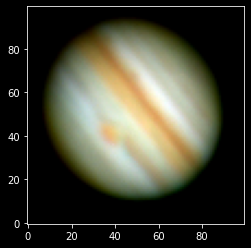

In [99]:
file_list_jup_shift_B = glob('shifted_jupiter_40ms_B*FIT')
file_list_jup_shift_V = glob('shifted_jupiter_40ms_V*FIT')
file_list_jup_shift_I = glob('shifted_jupiter_40ms_I*FIT')


timeseries_jup_B = np.array([fits.getdata(fn) for fn in file_list_jup_shift_B])
timeseries_jup_V = np.array([fits.getdata(fn) for fn in file_list_jup_shift_V])
timeseries_jup_I = np.array([fits.getdata(fn) for fn in file_list_jup_shift_I])

Bband_jup_median = np.median(timeseries_jup_B, axis = 0)
Vband_jup_median = np.median(timeseries_jup_V, axis = 0)
Iband_jup_median = np.median(timeseries_jup_I, axis = 0)

jup_bslc = slice(280,380), slice(210,310)
jup_vslc = slice(280,380), slice(210,310)
jup_Islc = slice(280,380), slice(210,310)

max_ = 100
min_ = 45

norm_B_jup = visualization.simple_norm(Bband_jup_median[jup_bslc], 
                                   stretch = 'linear', 
                                   min_percent = 50, 
                                   max_percent = max_)

norm_V_jup = visualization.simple_norm(Vband_jup_median[jup_vslc], 
                                   stretch = 'linear', 
                                   min_percent = min_, 
                                   max_percent = max_)

norm_I_jup = visualization.simple_norm(Iband_jup_median[jup_Islc], 
                                   stretch = 'linear', 
                                   min_percent = min_, 
                                   max_percent = max_)

jup_color = np.array([norm_I_jup(Iband_jup_median),
                         norm_V_jup(Vband_jup_median),
                         norm_B_jup(Bband_jup_median)])


jup_color=jup_color.T.swapaxes(0,1)
jup_color[:,:,0] = np.roll(jup_color[:,:,0], 0, axis=0)
jup_color[:,:,0] = np.roll(jup_color[:,:,0], 0, axis=1)
jup_bslc3d = (jup_bslc[0], jup_bslc[1], slice(None))

pl.imshow(jup_color[jup_bslc3d])

In [100]:
cd ..

C:\Users\Sydnee O'Donnell\OneDrive\UF\Obs Tech 1\AST3722-Fall-2021-09-29-21


In [102]:
#fh = fits.PrimaryHDU(data = Iband_jup_median, header=header) 
#fh.writeto('jupiter_I_darksub_flattened.FIT', overwrite=True)

In [ ]:
fh = fits.PrimaryHDU(data = Vband_jup_median, header=header) 
fh.writeto('jupiter_V_darksub_flattened.FIT', overwrite=True)

In [ ]:
fh = fits.PrimaryHDU(data = Bband_jup_median, header=header) 
fh.writeto('jupiter_B_darksub_flattened.FIT', overwrite=True)

In [103]:
flat = [clear_flat, B_flat, V_flat, I_flat]
flat_timestream = []
mean_flat = []
bias_subtracted_flat = []
normed_flat = []

for i in range(4):
    flat_timestream.append([fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in flat[i]])
    mean_flat.append(np.mean(flat_timestream[i], axis=0))
    bias_subtracted_flat.append(mean_flat[i] - mean_bias)
    normed_flat.append(bias_subtracted_flat[i]/bias_subtracted_flat[i].mean())
    
del flat_timestream


In [108]:
photon_noise_flat = []
total_noise_flat = []
average_flat_uncertainty = []
norm_flat_uncertainty = []
for i in range(3):
    photon_noise_flat.append(timeseries_sat[i]**0.5)
    total_noise_flat.append((photon_noise_flat[i]**2 + 
                        uncertainty_on_40ms_mean_dark**2 +
                        readnoise**2)**0.5)
    average_flat_uncertainty.append(total_noise_flat[i] / np.sqrt(len(biases)))
    norm_flat_uncertainty.append(average_flat_uncertainty[i] / bias_subtracted_flat[i].mean())


In [109]:
photon_noise_estimate_jup = []
total_noise_estimate_jup = []
total_flat_noise_estimate_jup = []
final_mean_jup_noise = []
timeseries_jup = [timeseries_jup_B,
                 timeseries_jup_V,
                 timeseries_jup_I]

for i in range(3):
    photon_noise_estimate_jup.append(timeseries_jup[i]**0.5)
    photon_noise_estimate_jup[i][np.isnan(photon_noise_estimate_jup[i])] = 0
    total_noise_estimate_jup.append((photon_noise_estimate_jup[i]**2 + 
                                      uncertainty_on_40ms_mean_dark**2 +
                                      readnoise**2)**0.5)

    total_flat_noise_estimate_jup.append((((
        total_noise_estimate_jup[i]**2 /
        timeseries_jup[i]**2)
        + (norm_flat_uncertainty[i]**2 / normed_flat[i]**2)) * 
        timeseries_jup[i]**2)**0.5)
    final_mean_jup_noise.append(((
        total_flat_noise_estimate_jup[i]**2).sum(axis=0) /
        total_flat_noise_estimate_jup[i].shape[0]**2)**0.5)


In [110]:
total_counts_jup_B = Bband_jup_median[jup_bslc].sum()
total_counts_jup_V = Vband_jup_median[jup_vslc].sum()
total_counts_jup_I = Iband_jup_median[jup_Islc].sum()

print(f"Photon Counts: B={total_counts_jup_B:0.3g} photons, V={total_counts_jup_V:0.3g} photons, I={total_counts_jup_I:0.3g} photons,")
      
rate_B_jup = total_counts_jup_B / 0.04
rate_V_jup = total_counts_jup_V / 0.04
rate_I_jup = total_counts_jup_I / 0.04

print(f"Photon Rates: B={rate_B_jup:0.3g} ph/s, V={rate_V_jup:0.3g} ph/s, I={rate_I_jup:0.3g} ph/s,")


Photon Counts: B=4.59e+07 photons, V=1.24e+08 photons, I=9.11e+07 photons,
Photon Rates: B=1.15e+09 ph/s, V=3.09e+09 ph/s, I=2.28e+09 ph/s,


In [118]:
total_counts_jup_B,total_counts_jup_V,total_counts_jup_I

(45939792.8, 123680230.35, 91090152.0)

In [112]:
uncertainty_cts_B_jup = np.nansum(final_mean_jup_noise[0][jup_bslc]**2)**0.5
uncertainty_cts_V_jup = np.nansum(final_mean_jup_noise[1][jup_vslc]**2)**0.5
uncertainty_cts_I_jup = np.nansum(final_mean_jup_noise[2][jup_Islc]**2)**0.5

uncertainty_rate_B_jup = uncertainty_cts_B_jup / 0.04
uncertainty_rate_V_jup = uncertainty_cts_V_jup / 0.04
uncertainty_rate_I_jup = uncertainty_cts_I_jup / 0.04

print(f"Jupiter Flux B Band ={rate_B_jup:12.3g} +/- {uncertainty_rate_B_jup:12.3g} ph/s ( SNR ={rate_B_jup/uncertainty_rate_B_jup:10.3g})")
print(f"Jupiter Flux V Band ={rate_V_jup:12.3g} +/- {uncertainty_rate_V_jup:12.3g} ph/s ( SNR ={rate_V_jup/uncertainty_rate_V_jup:10.3g})")
print(f"Jupiter Flux I Band ={rate_I_jup:12.3g} +/- {uncertainty_rate_I_jup:12.3g} ph/s ( SNR ={rate_I_jup/uncertainty_rate_I_jup:10.3g})")


Jupiter Flux B Band =    1.15e+09 +/-     7.78e+04 ph/s ( SNR =  1.48e+04)
Jupiter Flux V Band =    3.09e+09 +/-     1.28e+05 ph/s ( SNR =  2.42e+04)
Jupiter Flux I Band =    2.28e+09 +/-     1.09e+05 ph/s ( SNR =  2.09e+04)


In [119]:
uncertainty_cts_B_jup,uncertainty_cts_V_jup,uncertainty_cts_I_jup

(3113.522483809833, 5107.312267779638, 4365.369687493648)